In [11]:
import numpy as np                                      
import matplotlib.pyplot as plt                         
import matplotlib.patches as patches
import seaborn as sns
import scipy.signal as signal 
from scipy.io import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import pandas as pd
from scipy.signal import welch
from sklearn.decomposition import FastICA

In [12]:
# load dataset: ./datasets/bi2015a/subject_01_session_01.csv
df = pd.read_csv('./datasets/bi2015a/subject_03_session_01.csv', header=None)
X_train = df.iloc[:, 1:33].values
X_train.shape

(132160, 32)

In [13]:
b = signal.firwin(numtaps=31, cutoff=[1, 24], pass_zero='bandpass', fs=512)
a = 1
def preprocess(x):
    if x.ndim == 3:
        print("error, x.ndim == 3")
        # correct DC offset of signal
    x = x - np.mean(x, axis=0)
        # bandpass filter
    return signal.filtfilt(b, a, x, axis=0)

(1536, 32)


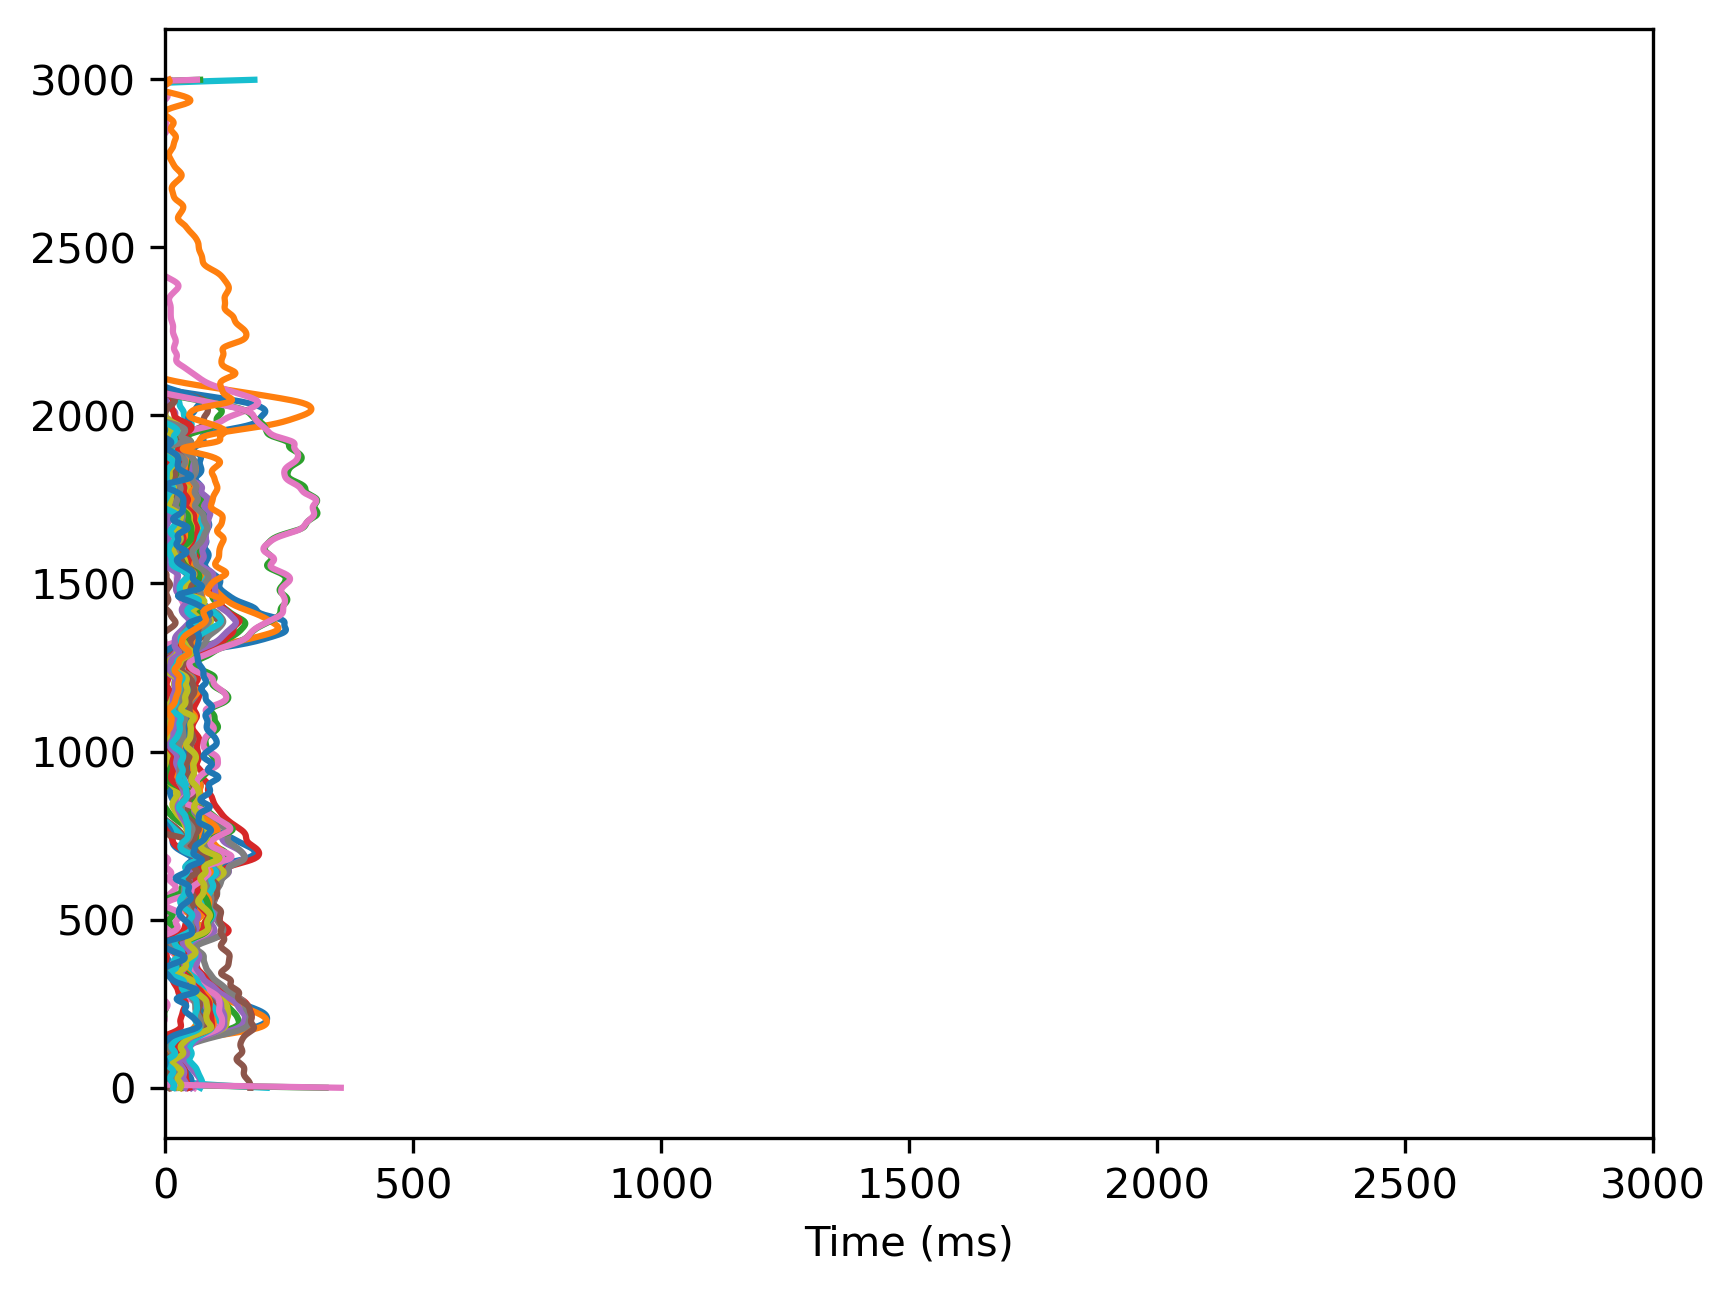

In [27]:
# plot for 2 seconds
start = 5950
segment = X_train[start:start+512*3, :]
segment = preprocess(segment)
print(segment.shape)
x_axis = np.arange(0, 3000, 3000/3/512)
plt.plot(x_axis,segment[:, :])
# x axis label, and range
plt.gca().set_xlabel('Time (ms)')
plt.gca().set_xlim([0, 3000])
plt.gcf().set_dpi(300)
plt.show()

(1536, 1)


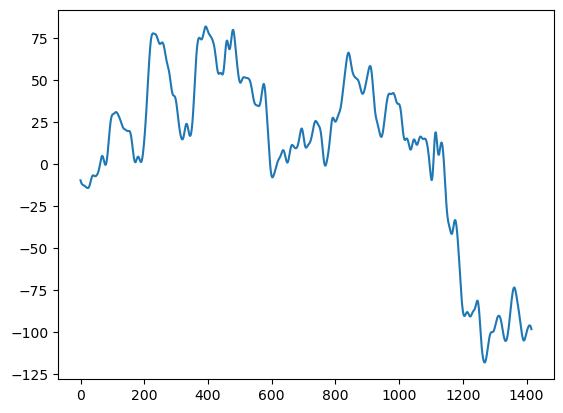

In [23]:
# plot for 2 seconds, PZ
start = 5800
segment = X_train[start:start+512*3, 22:23]
segment = preprocess(segment)
print(segment.shape)
plt.plot(segment[20:-100, :]);